 Predict the price of a used vehicle in Germany based on features : 

Gather and Load Data

In [1]:
import pandas as pd

df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"


Data Exploration and Cleaning

In [ ]:
df = df.drop(columns=['color', 'registration_date', 'offer_description'])

In [6]:
df.head()

,Unnamed: 0,brand,model,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
0,0,alfa-romeo,Alfa Romeo GTV,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0
1,1,alfa-romeo,Alfa Romeo 164,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0
2,2,alfa-romeo,Alfa Romeo Spider,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0
3,3,alfa-romeo,Alfa Romeo Spider,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0
4,4,alfa-romeo,Alfa Romeo 164,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0


In [7]:
print(df.isnull().sum())

Unnamed: 0                      0
brand                           0
model                           0
year                            0
price_in_euro                   0
power_kw                      134
power_ps                      129
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    26873
fuel_consumption_g_km           0
mileage_in_km                 152
dtype: int64


In [8]:
print(df.dtypes)

Unnamed: 0                    int64
brand                        object
model                        object
year                         object
price_in_euro                object
power_kw                     object
power_ps                     object
transmission_type            object
fuel_type                    object
fuel_consumption_l_100km     object
fuel_consumption_g_km        object
mileage_in_km               float64
dtype: object


In [9]:
# Step 1: Convert 'year' to numeric
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Step 2: Convert 'price_in_euro' to numeric 
df['price_in_euro'] = pd.to_numeric(df['price_in_euro'], errors='coerce')

# Step 3: Convert 'power_kw' and 'power_ps' to numeric
df['power_kw'] = pd.to_numeric(df['power_kw'], errors='coerce')
df['power_ps'] = pd.to_numeric(df['power_ps'], errors='coerce')

print(df.dtypes)

Unnamed: 0                    int64
brand                        object
model                        object
year                        float64
price_in_euro               float64
power_kw                    float64
power_ps                    float64
transmission_type            object
fuel_type                    object
fuel_consumption_l_100km     object
fuel_consumption_g_km        object
mileage_in_km               float64
dtype: object


In [10]:
# Step 4: Clean 'fuel_consumption_l_100km' and convert to numeric
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].str.replace(' l/100 km', '')
df['fuel_consumption_l_100km'] = pd.to_numeric(df['fuel_consumption_l_100km'], errors='coerce')

print(df.dtypes)

Unnamed: 0                    int64
brand                        object
model                        object
year                        float64
price_in_euro               float64
power_kw                    float64
power_ps                    float64
transmission_type            object
fuel_type                    object
fuel_consumption_l_100km    float64
fuel_consumption_g_km        object
mileage_in_km               float64
dtype: object


In [13]:
original_data = pd.read_csv('data.csv', usecols=['fuel_consumption_l_100km'])
df['fuel_consumption_l_100km'] = original_data['fuel_consumption_l_100km']
print(df['fuel_consumption_l_100km'].head())

0    10,9 l/100 km
1              NaN
2              NaN
3     9,5 l/100 km
4     7,2 l/100 km
Name: fuel_consumption_l_100km, dtype: object


In [14]:
# Step 4: Clean 'fuel_consumption_l_100km' and convert to numeric
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].str.strip()
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].str.replace(' l/100 km', '', regex=False)
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].str.replace(',', '.', regex=False)

df['fuel_consumption_l_100km'] = pd.to_numeric(df['fuel_consumption_l_100km'], errors='coerce')
print(df['fuel_consumption_l_100km'].head())

0    10.9
1     NaN
2     NaN
3     9.5
4     7.2
Name: fuel_consumption_l_100km, dtype: float64


Handle power_kw and power_ps:

These columns contain engine power information. Since they're related (1 kW = 1.36 PS), we can fill missing values based on their relationship.

In [15]:
df['power_kw'] = df['power_kw'].fillna(df['power_ps'] * 0.7355)
df['power_ps'] = df['power_ps'].fillna(df['power_kw'] * 1.36)

df['power_kw'].fillna(df['power_kw'].median(), inplace=True)
df['power_ps'].fillna(df['power_ps'].median(), inplace=True)

print(df[['power_kw', 'power_ps']].isnull().sum())

power_kw    0
power_ps    0
dtype: int64


Handle fuel_consumption_l_100km:

The fuel consumption column has a large number of missing values. We can fill these missing values based on similar rows (e.g., same model, year, and fuel type). 

In [17]:
df['fuel_consumption_l_100km'] = df.groupby(['model', 'year', 'fuel_type'])['fuel_consumption_l_100km'].transform(lambda x: x.fillna(x.median()))
df['fuel_consumption_l_100km'].fillna(df['fuel_consumption_l_100km'].median(), inplace=True)

print(df['fuel_consumption_l_100km'].isnull().sum())

0


 Handle mileage_in_km: 
 
 We fill the missing mileage values using the approximation (2023 - year) * average_mileage_per_year, while leaving the existing mileage values intact. 

In [ ]:
# Assuming an average mileage of 15,000 km per year
average_mileage_per_year = 15000

df['year'] = df['year'].apply(lambda x: min(int(x), 2023)) 

df['mileage_in_km'] = df['mileage_in_km'].fillna((2023 - df['year']) * average_mileage_per_year).astype('float64')

print("Missing values in 'mileage_in_km':", df['mileage_in_km'].isnull().sum())

In [19]:
df['year'].isnull().sum()

195

In [22]:
df_original_data = pd.read_csv('data.csv')

df_original_data['registration_date'] = pd.to_datetime(df_original_data['registration_date'], format='%m/%Y', errors='coerce')
df_original_data['year_from_registration'] = df_original_data['registration_date'].dt.year
df = df.merge(df_original_data[['Unnamed: 0', 'year_from_registration']], on='Unnamed: 0', how='left')
df['year'] = df['year'].fillna(df['year_from_registration'])
df.drop(columns=['year_from_registration'], inplace=True)
print(df[['year']])

          year
0       1995.0
1       1995.0
2       1995.0
3       1995.0
4       1996.0
...        ...
251074  2023.0
251075  2023.0
251076  2023.0
251077  2023.0
251078  2023.0

[251079 rows x 1 columns]


In [23]:
df['year'].isnull().sum()

195

In [25]:
df = df.dropna(subset=['year'])

print("Remaining rows after dropping missing values in 'year':", df.shape[0])
print("Missing values in the DataFrame after dropping rows:", df.isnull().sum())

Remaining rows after dropping missing values in 'year': 250884
Missing values in the DataFrame after dropping rows: Unnamed: 0                   0
brand                        0
model                        0
year                         0
price_in_euro                4
power_kw                     0
power_ps                     0
transmission_type            0
fuel_type                    0
fuel_consumption_l_100km     0
fuel_consumption_g_km        0
mileage_in_km               66
dtype: int64


In [26]:
df = df.dropna(subset=['price_in_euro', 'mileage_in_km'])
print("Remaining rows after dropping rows with missing values:", df.shape[0])

Remaining rows after dropping rows with missing values: 250818


In [33]:
df.drop(columns=['power_ps'], inplace=True)

In [44]:
df.drop(columns=['fuel_consumption_g_km'], inplace=True)

Exploratory Data Analysis (EDA)

In [34]:
print(df.describe())

          Unnamed: 0           year  price_in_euro       power_kw  \
count  250818.000000  250818.000000   2.508180e+05  250818.000000   
mean   125532.978451    2016.261552   2.613688e+04     126.220977   
std     72483.214299       5.462751   3.699225e+04      72.006528   
min         0.000000    1995.000000   1.200000e+02       1.000000   
25%     62771.250000    2013.000000   1.199000e+04      82.000000   
50%    125529.500000    2018.000000   1.989000e+04     110.000000   
75%    188298.750000    2020.000000   2.995000e+04     140.000000   
max    251078.000000    2023.000000   5.890500e+06     735.000000   

       fuel_consumption_l_100km  mileage_in_km  
count             250818.000000   2.508180e+05  
mean                   6.073303   8.536867e+04  
std                    2.563872   7.872133e+04  
min                    0.000000   0.000000e+00  
25%                    4.900000   2.495000e+04  
50%                    5.700000   6.751500e+04  
75%                    6.700000   1

c:\Users\aicha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_in_euro', ylabel='Count'>

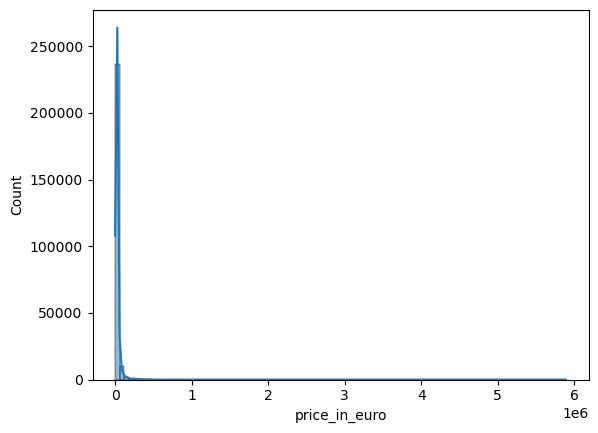

In [35]:
sns.histplot(df['price_in_euro'], bins=100, kde=True)  

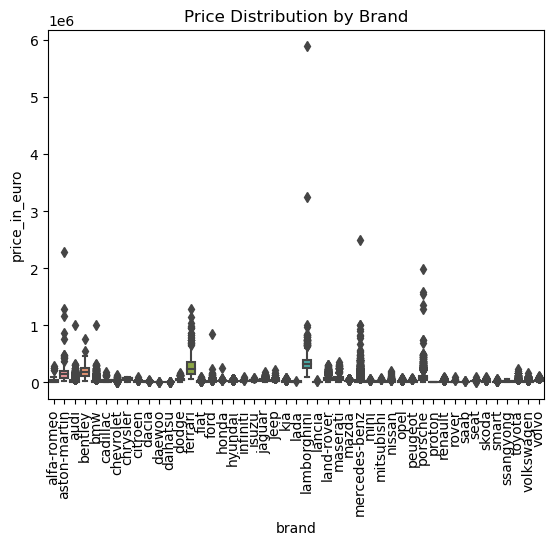

In [36]:
sns.boxplot(x='brand', y='price_in_euro', data=df)
plt.xticks(rotation=90)
plt.title('Price Distribution by Brand')
plt.show()

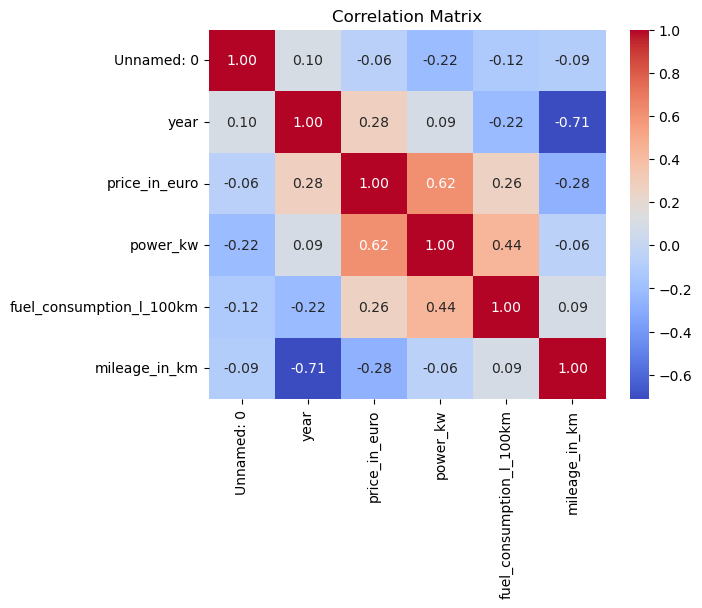

In [37]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

Feature Engineering

In [38]:
df['car_age'] = 2023 - df['year']

In [39]:
df['fuel_efficiency'] = 100 / df['fuel_consumption_l_100km']  # l/100 km to km/l

In [45]:
df.head()

,Unnamed: 0,brand,model,year,price_in_euro,power_kw,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km,car_age,fuel_efficiency
0,0,alfa-romeo,Alfa Romeo GTV,1995.0,1300.0,148.0,Manual,Petrol,10.9,160500.0,28.0,9.174312
1,1,alfa-romeo,Alfa Romeo 164,1995.0,24900.0,191.0,Manual,Petrol,5.7,190000.0,28.0,17.543860
2,2,alfa-romeo,Alfa Romeo Spider,1995.0,5900.0,110.0,Unknown,Petrol,9.5,129000.0,28.0,10.526316
3,3,alfa-romeo,Alfa Romeo Spider,1995.0,4900.0,110.0,Manual,Petrol,9.5,189500.0,28.0,10.526316
4,4,alfa-romeo,Alfa Romeo 164,1996.0,17950.0,132.0,Manual,Petrol,7.2,96127.0,27.0,13.888889


Data Visualization

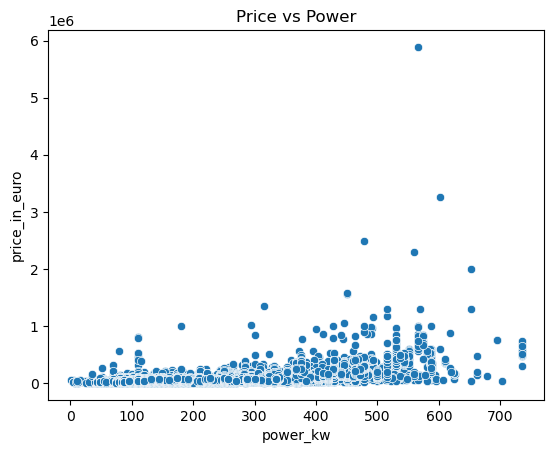

In [40]:
sns.scatterplot(x='power_kw', y='price_in_euro', data=df)
plt.title('Price vs Power')
plt.show()

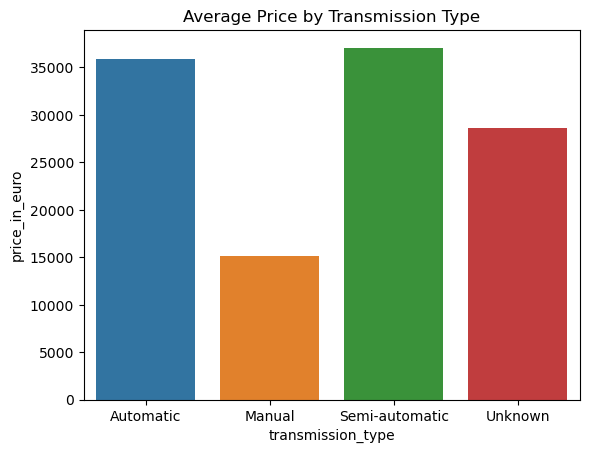

In [41]:
avg_price_by_transmission = df.groupby('transmission_type')['price_in_euro'].mean().reset_index()
sns.barplot(x='transmission_type', y='price_in_euro', data=avg_price_by_transmission)
plt.title('Average Price by Transmission Type')
plt.show()

Modeling

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [51]:
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['transmission_type', 'fuel_type'], drop_first=True)

# Splitting the dataset
X = df_encoded.drop(['price_in_euro'], axis=1)  # Features
y = df_encoded['price_in_euro']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
import pandas as pd

# Assuming X_train and X_test are your training and testing DataFrames
# Convert categorical columns to numerical using one-hot encoding
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure that both train and test have the same columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [62]:
# Check for NaN values
print(X_train.isna().sum())

# Check for infinite values
print((X_train == float('inf')).sum())
print((X_train == float('-inf')).sum())

Unnamed: 0                            0
year                                  0
power_kw                              0
fuel_consumption_l_100km              0
mileage_in_km                         0
                                     ..
model_smart city-coupé/city-cabrio    0
model_smart forFour                   0
model_smart forTwo                    0
model_smart roadster                  0
model_smart smart #1                  0
Length: 1347, dtype: int64
Unnamed: 0                            0
year                                  0
power_kw                              0
fuel_consumption_l_100km              0
mileage_in_km                         0
                                     ..
model_smart city-coupé/city-cabrio    0
model_smart forFour                   0
model_smart forTwo                    0
model_smart roadster                  0
model_smart smart #1                  0
Length: 1347, dtype: int64
Unnamed: 0                            0
year                      

In [63]:
# Check for infinite values
print("Infinite values in training set:")
print((X_train == float('inf')).sum())
print((X_train == float('-inf')).sum())

# Check for infinite values in the test set as well
print("Infinite values in test set:")
print((X_test == float('inf')).sum())
print((X_test == float('-inf')).sum())

Infinite values in training set:
Unnamed: 0                            0
year                                  0
power_kw                              0
fuel_consumption_l_100km              0
mileage_in_km                         0
                                     ..
model_smart city-coupé/city-cabrio    0
model_smart forFour                   0
model_smart forTwo                    0
model_smart roadster                  0
model_smart smart #1                  0
Length: 1347, dtype: int64
Unnamed: 0                            0
year                                  0
power_kw                              0
fuel_consumption_l_100km              0
mileage_in_km                         0
                                     ..
model_smart city-coupé/city-cabrio    0
model_smart forFour                   0
model_smart forTwo                    0
model_smart roadster                  0
model_smart smart #1                  0
Length: 1347, dtype: int64
Infinite values in test set:
Unna

In [64]:
# Display the maximum values in the training set
print("Maximum values in training set:")
print(X_train.max())

# Display the maximum values in the test set
print("Maximum values in test set:")
print(X_test.max())

Maximum values in training set:
Unnamed: 0                               251078
year                                     2023.0
power_kw                                  735.0
fuel_consumption_l_100km                  173.0
mileage_in_km                         3800000.0
                                        ...    
model_smart city-coupé/city-cabrio         True
model_smart forFour                        True
model_smart forTwo                         True
model_smart roadster                       True
model_smart smart #1                       True
Length: 1347, dtype: object
Maximum values in test set:
Unnamed: 0                               251077
year                                     2023.0
power_kw                                  735.0
fuel_consumption_l_100km                  146.0
mileage_in_km                         2100000.0
                                        ...    
model_smart city-coupé/city-cabrio         True
model_smart forFour                        True


In [67]:
# Define a threshold for mileage
mileage_threshold = X_train['mileage_in_km'].quantile(0.99)

# Cap values above this threshold
X_train['mileage_in_km'] = X_train['mileage_in_km'].clip(upper=mileage_threshold)
X_test['mileage_in_km'] = X_test['mileage_in_km'].clip(upper=mileage_threshold)

In [70]:
import numpy as np

# Replace infinite values with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

In [71]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # or 'median'
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [72]:

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    # Add other models here if needed
}

# Function to train and evaluate models
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mae, mse, r2

# Train and evaluate each model
results = {}
for name, model in models.items():
    mae, mse, r2 = train_and_evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = {'MAE': mae, 'MSE': mse, 'R2': r2}

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

                           MAE           MSE        R2
Linear Regression  5560.809816  2.550771e+08  0.775604
Decision Tree      4387.977454  2.835427e+08  0.750562


Metric Interpretation

Mean Absolute Error (MAE): The Decision Tree model has a lower MAE, indicating that it generally makes predictions closer to the actual values compared to Linear Regression.

Mean Squared Error (MSE): The Decision Tree has a higher MSE, suggesting it has larger errors in some predictions, despite the lower MAE. This could be due to outliers affecting the MSE more significantly.

R² (Coefficient of Determination): The R² value indicates that Linear Regression explains about 77.6% of the variance in the dependent variable, while the Decision Tree explains 75.1%. This suggests that Linear Regression may fit the data slightly better.